In [1]:
import pandas as pd 

In [2]:
import os 
os.getcwd()

'/home/maciektr/Programowanie/parallel_lab/cuda/Lab2/report'

In [110]:
df = pd.read_csv("../matrix_transpose/result1.txt", sep=';')\
.sort_values(['type', 'size', 'block_size'])\
.reset_index().drop(columns=["index"])
df

,size,time,type,grid_size,block_size
0,256,1.147200,naive,32,8
1,256,1.233824,naive,16,16
2,256,1.439904,naive,8,32
3,256,1.204736,naive,4,64
4,256,1.144288,naive,2,128
...,...,...,...,...,...
247,16384,1099.203247,shared,128,128
248,16384,1263.985718,shared,64,256
249,16384,954.606384,shared,32,512
250,16384,822.848755,shared,16,1024


In [111]:
pivoted = df.pivot(values='time', columns=['type'], index=['size', 'block_size'])
pivoted

type                   naive  optimised_naive  optimised_shared       shared
size  block_size                                                            
256   8             1.147200         1.225472          1.454848     1.543744
      16            1.233824         1.242240          1.322976     1.761344
      32            1.439904         1.412000          1.422464     1.331040
      64            1.204736         1.222752          1.185568     1.155360
      128           1.144288         1.189184          1.027872     1.230272
...                      ...              ...               ...          ...
16384 128         759.250061       782.705566       1443.938110  1099.203247
      256         828.752075       852.826416        911.026978  1263.985718
      512         942.344727       773.357971        900.996582   954.606384
      1024        816.043213       877.844238       1025.398315   822.848755
      2048        866.508179      1009.972778        839.814392   771.508911

[63 rows x 4 columns]

<AxesSubplot:xlabel='size,block_size'>

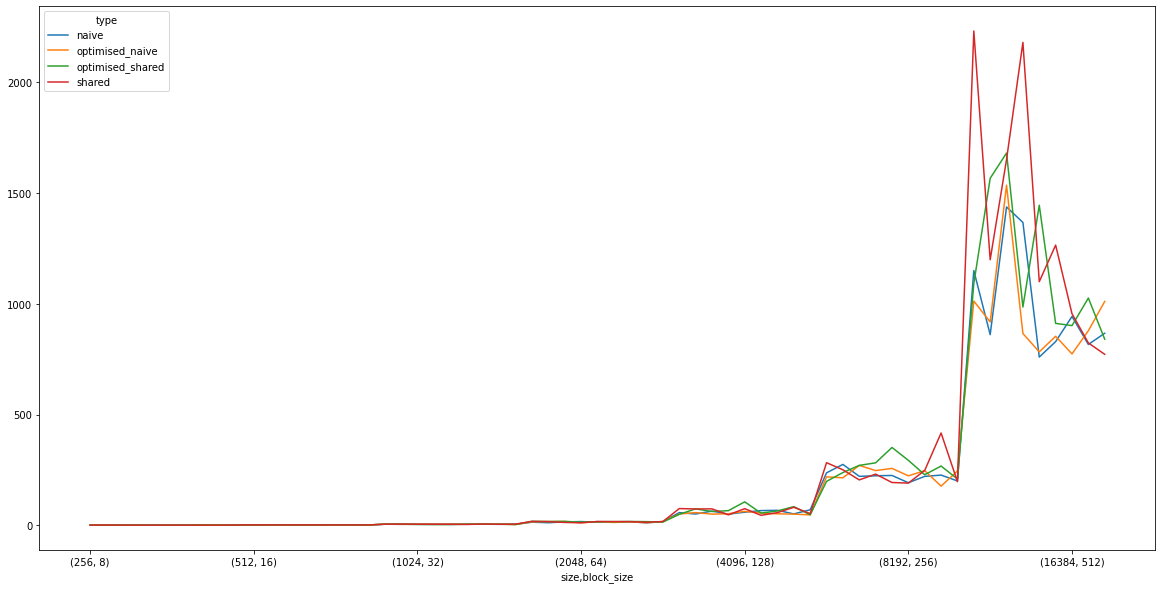

In [112]:
pivoted.plot(figsize=(20,10))

In [113]:
pivoted = df.pivot(values='time', columns=['type', 'size'], index=['block_size'])
pivoted

type           naive                                                        \
size           256       512       1024       2048       4096        8192    
block_size                                                                   
8           1.147200  2.142816  5.437088  14.498176  57.756096  237.059906   
16          1.233824  2.088320  5.339264  12.193568  51.324738  275.064728   
32          1.439904  2.248160  5.194688  15.872800  64.638718  221.320923   
64          1.204736  1.938240  4.963808  17.333183  50.920834  223.757950   
128         1.144288  1.867296  5.008288  14.342880  59.574528  225.259232   
256         1.127904  1.523904  5.163456  15.469792  66.952766  192.497787   
512         1.157600  1.844576  5.490112  16.583776  68.139549  221.125351   
1024        1.373056  1.918656  4.886912  11.602048  51.932865  226.850174   
2048        1.146848  2.034976  5.471488  17.272320  70.440704  200.525543   

type                    optimised_naive                      ...  \
size              16384           256       512       1024   ...   
block_size                                                   ...   
8           1149.033691        1.225472  2.119008  5.683488  ...   
16           860.379211        1.242240  2.067040  4.481824  ...   
32          1436.050171        1.412000  1.802464  5.397568  ...   
64          1366.079224        1.222752  1.900512  5.234816  ...   
128          759.250061        1.189184  1.847104  4.953184  ...   
256          828.752075        1.116704  1.883008  5.393920  ...   
512          942.344727        1.200544  1.960736  5.225952  ...   
1024         816.043213        1.736448  1.961600  5.232288  ...   
2048         866.508179        1.371232  1.939744  3.981472  ...   

type       optimised_shared                             shared            \
size                  4096        8192         16384     256       512     
block_size                                                                 
8                 49.943871  198.495712  1090.509766  1.543744  1.885696   
16                74.610626  238.425507  1565.342773  1.761344  2.363680   
32                62.614689  270.701202  1679.145020  1.331040  2.224800   
64                66.525795  282.217926   984.810547  1.155360  2.037056   
128              106.269661  351.490662  1443.938110  1.230272  2.549376   
256               55.582783  293.421051   911.026978  1.430112  1.970880   
512               65.228767  228.599426   900.996582  1.075328  2.179328   
1024              84.664925  267.607880  1025.398315  1.154432  2.138432   
2048              47.916897  209.444641   839.814392  1.108000  1.940256   

type                                                                 
size           1024       2048       4096        8192         16384  
block_size                                                           
8           5.470208  18.452513  76.002083  282.801636  2229.500977  
16          6.075520  16.999647  74.150467  250.793884  1197.894775  
32          5.406528  13.354560  74.599396  205.216263  1650.019531  
64          5.267232  11.857536  47.683136  231.287491  2178.071289  
128         5.308000  17.611616  75.540962  193.517029  1099.203247  
256         4.320128  17.377825  45.473793  190.781433  1263.985718  
512         6.109696  17.065472  57.703136  248.004990   954.606384  
1024        5.195712  14.264736  81.665504  416.782623   822.848755  
2048        5.886496  17.410433  53.307999  197.282303   771.508911  

[9 rows x 28 columns]

<AxesSubplot:title={'center':'Execuction time by block size.'}, xlabel='block_size'>

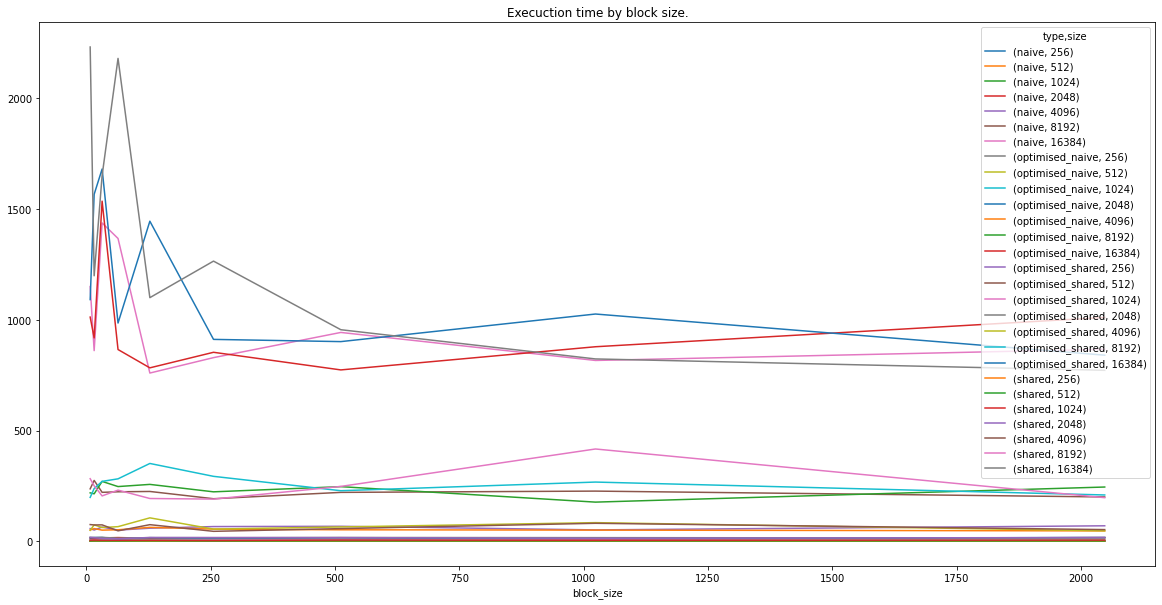

In [114]:
pivoted.plot(figsize=(20,10), title="Execuction time by block size.")

<AxesSubplot:title={'center':'Execuction time by block size, log scale.'}, xlabel='block_size'>

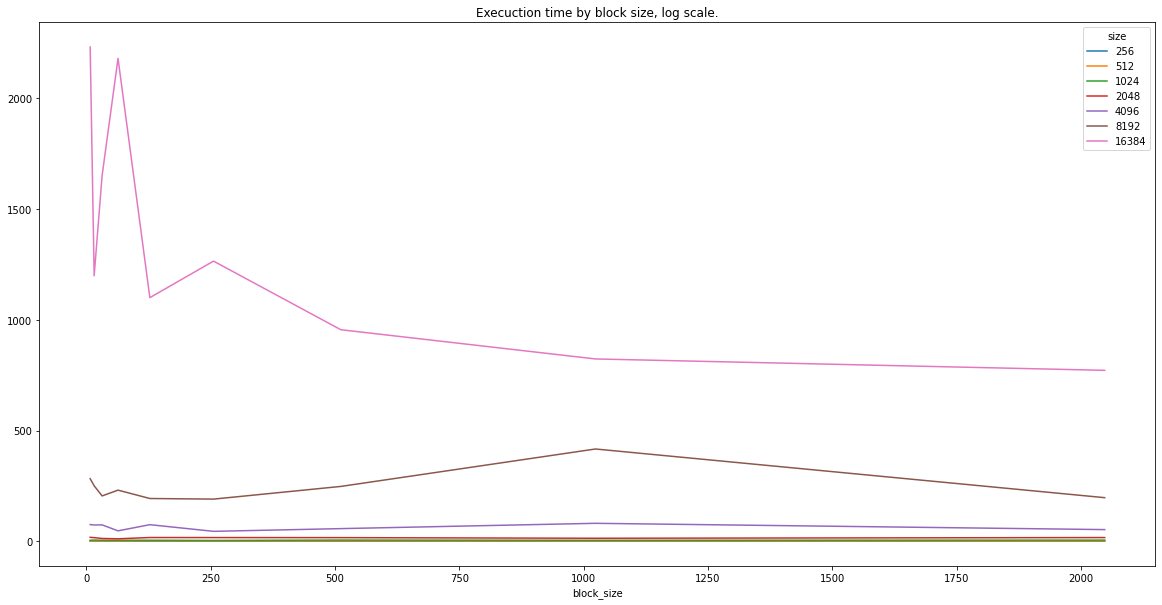

In [115]:
pivoted =df[df['type'] == 'shared'].drop(columns=['type']).pivot(values='time', columns=['size'], index=['block_size'])
pivoted.plot(figsize=(20,10), title='Execuction time by block size, log scale.')

In [48]:
df

,size,time,type,grid_size,block_size
0,256,1.147200,naive,32,8
1,256,1.233824,naive,16,16
2,256,1.439904,naive,8,32
3,256,1.204736,naive,4,64
4,256,1.144288,naive,2,128
...,...,...,...,...,...
247,16384,1099.203247,shared,128,128
248,16384,1263.985718,shared,64,256
249,16384,954.606384,shared,32,512
250,16384,822.848755,shared,16,1024


In [59]:
mean = df.groupby(by=['type', 'size']).mean().reset_index()
mean

,type,size,time,grid_size,block_size
0,naive,256,1.219484,7.000000,454.222222
1,naive,512,1.956327,14.111111,454.222222
2,naive,1024,5.217234,28.333333,454.222222
3,naive,2048,15.018727,56.777778,454.222222
4,naive,4096,60.186755,113.555556,454.222222
5,naive,8192,224.829066,227.111111,454.222222
6,naive,16384,1002.715617,454.222222,454.222222
7,optimised_naive,256,1.301842,7.000000,454.222222
8,optimised_naive,512,1.942357,14.111111,454.222222
9,optimised_naive,1024,5.064946,28.333333,454.222222


In [62]:
pivoted = mean.pivot(values='time', columns='type', index='size')
pivoted

type,naive,optimised_naive,optimised_shared,shared
size,,,,
256,1.219484,1.301842,1.259342,1.309959
512,1.956327,1.942357,1.984487,2.143278
1024,5.217234,5.064946,4.822645,5.448836
2048,15.018727,15.480938,16.918066,16.043815
4096,60.186755,53.590322,68.150890,65.125164
8192,224.829066,233.511566,260.044890,246.274184
16384,1002.715617,958.388699,1160.109165,1351.959954


<AxesSubplot:title={'center':'Execution time by size.'}, xlabel='size'>

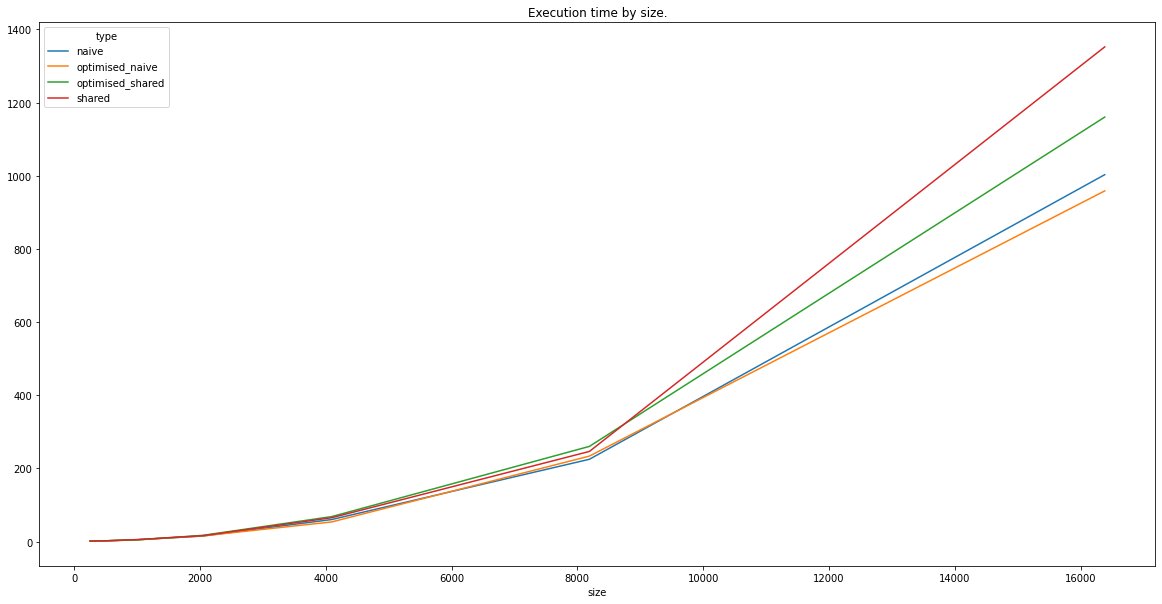

In [67]:
pivoted.plot(figsize=(20,10), title='Execution time by size.')

<AxesSubplot:title={'center':'Execution time by size, log scale.'}, xlabel='size'>

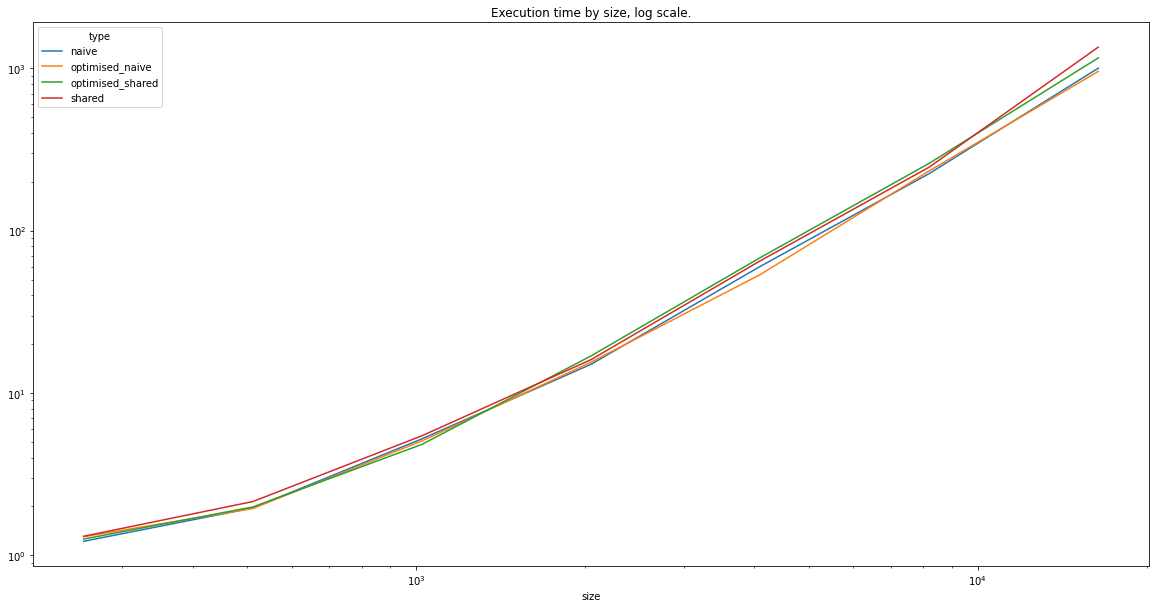

In [68]:
pivoted.plot(figsize=(20,10), logx=True, logy=True, title='Execution time by size, log scale.')

In [70]:
df = pd.read_csv("../matrix_transpose/result.txt", sep=';')\
.sort_values(['type', 'size', 'block_size'])\
.reset_index().drop(columns=["index"])
df

,size,time,type,grid_size,block_size
0,256,1.231168,optimised_naive,32,8
1,256,1.146912,optimised_naive,32,8
2,256,1.197408,optimised_naive,64,8
3,256,1.137248,optimised_naive,64,8
4,256,1.240480,optimised_naive,128,8
...,...,...,...,...,...
1618,131072,0.004096,optimised_shared,256,2048
1619,131072,0.005120,optimised_shared,32,2048
1620,131072,0.004096,optimised_shared,32,2048
1621,131072,0.006144,optimised_shared,16,2048


In [72]:
# grid = N / block * scale 
df['grid_mul'] = df['grid_size'] / df['size'] * df['block_size']
df

,size,time,type,grid_size,block_size,grid_mul
0,256,1.231168,optimised_naive,32,8,1.00
1,256,1.146912,optimised_naive,32,8,1.00
2,256,1.197408,optimised_naive,64,8,2.00
3,256,1.137248,optimised_naive,64,8,2.00
4,256,1.240480,optimised_naive,128,8,4.00
...,...,...,...,...,...,...
1618,131072,0.004096,optimised_shared,256,2048,4.00
1619,131072,0.005120,optimised_shared,32,2048,0.50
1620,131072,0.004096,optimised_shared,32,2048,0.50
1621,131072,0.006144,optimised_shared,16,2048,0.25


In [74]:
# .drop(columns=['grid_size','block_size'])
mean = df.groupby(by=['type', 'size', 'grid_mul']).mean().reset_index()
mean

,type,size,grid_mul,time,grid_size,block_size
0,optimised_naive,256,0.00,1.079516,0.000000,1100.800000
1,optimised_naive,256,0.25,1.214972,3.750000,30.000000
2,optimised_naive,256,0.50,1.166755,6.200000,49.600000
3,optimised_naive,256,1.00,1.154928,10.500000,84.000000
4,optimised_naive,256,2.00,1.140818,18.142857,145.142857
...,...,...,...,...,...,...
95,optimised_shared,131072,0.25,0.003584,908.444444,454.222222
96,optimised_shared,131072,0.50,0.003300,1816.888889,454.222222
97,optimised_shared,131072,1.00,0.003186,3633.777778,454.222222
98,optimised_shared,131072,2.00,0.003755,7267.555556,454.222222


In [77]:
pivoted = mean.pivot(values='time', columns=['type', 'grid_mul'], index='size')
pivoted

type     optimised_naive                                                   \
grid_mul            0.00        0.25         0.50        1.00        2.00   
size                                                                        
256             1.079516    1.214972     1.166755    1.154928    1.140818   
512             1.876749    1.977578     1.957280    1.918999    1.210764   
1024            4.971685    4.923957     5.174898    5.377826    3.614281   
2048           12.399643   15.308507    14.826840   14.954733   10.700816   
4096           62.481264   58.855579    53.803265   56.325227   34.892612   
8192                 NaN  201.080334   215.014028  215.141843  135.953108   
16384                NaN  950.195930  1367.232520  932.341268  592.523427   
65536                NaN    0.003470     0.003470    0.003413    0.003129   
131072               NaN    0.003356     0.003243    0.003470    0.003470   

type                 optimised_shared                                         \
grid_mul        4.00             0.00         0.25         0.50         1.00   
size                                                                           
256         1.173642         1.111611     1.313692     1.122090     1.153570   
512         1.249479         1.913469     2.013677     2.009683     1.920574   
1024        3.418473         4.617904     5.070843     5.150507     4.958702   
2048        9.889399        16.603888    17.320384    16.091678    15.372547   
4096       37.643985        47.682785    59.851091    59.409901    56.227885   
8192      145.118662              NaN   223.983393   243.346184   280.724544   
16384     542.943671              NaN  1130.516215  1202.441305  1042.725081   
65536       0.003186              NaN     0.003356     0.003300     0.004722   
131072      0.004153              NaN     0.003584     0.003300     0.003186   

type                              
grid_mul        2.00        4.00  
size                              
256         1.223721    1.208759  
512         1.117398    1.228960  
1024        3.849607    3.338933  
2048       10.260804    9.719179  
4096       36.595268   38.245081  
8192      140.026861  144.736576  
16384     667.288062  604.586653  
65536       0.003356    0.003129  
131072      0.003755    0.004722

<AxesSubplot:title={'center':'.'}, xlabel='size'>

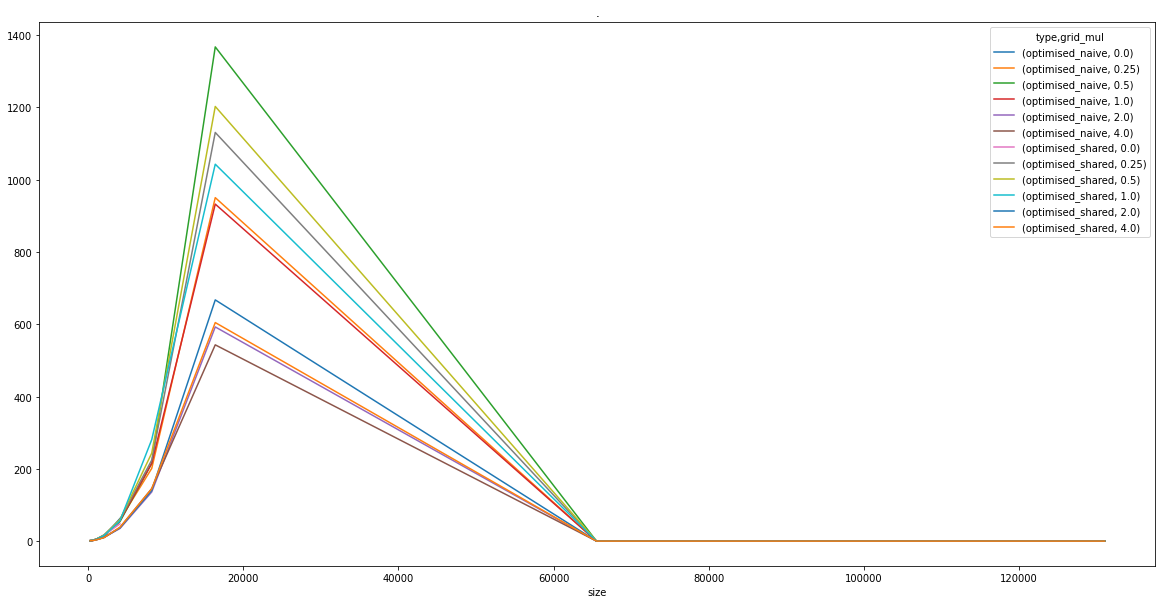

In [79]:
pivoted.plot(figsize=(20,10), title='.')

In [80]:
pivoted = mean.pivot(values='time', columns=['type', 'size'], index='grid_mul')
pivoted

type     optimised_naive                                            \
size              256       512       1024       2048       4096     
grid_mul                                                             
0.00            1.079516  1.876749  4.971685  12.399643  62.481264   
0.25            1.214972  1.977578  4.923957  15.308507  58.855579   
0.50            1.166755  1.957280  5.174898  14.826840  53.803265   
1.00            1.154928  1.918999  5.377826  14.954733  56.325227   
2.00            1.140818  1.210764  3.614281  10.700816  34.892612   
4.00            1.173642  1.249479  3.418473   9.889399  37.643985   

type                                                  optimised_shared  \
size          8192         16384     65536     131072           256      
grid_mul                                                                 
0.00             NaN          NaN       NaN       NaN         1.111611   
0.25      201.080334   950.195930  0.003470  0.003356         1.313692   
0.50      215.014028  1367.232520  0.003470  0.003243         1.122090   
1.00      215.141843   932.341268  0.003413  0.003470         1.153570   
2.00      135.953108   592.523427  0.003129  0.003470         1.223721   
4.00      145.118662   542.943671  0.003186  0.004153         1.208759   

type                                                                         \
size        512       1024       2048       4096        8192         16384    
grid_mul                                                                      
0.00      1.913469  4.617904  16.603888  47.682785         NaN          NaN   
0.25      2.013677  5.070843  17.320384  59.851091  223.983393  1130.516215   
0.50      2.009683  5.150507  16.091678  59.409901  243.346184  1202.441305   
1.00      1.920574  4.958702  15.372547  56.227885  280.724544  1042.725081   
2.00      1.117398  3.849607  10.260804  36.595268  140.026861   667.288062   
4.00      1.228960  3.338933   9.719179  38.245081  144.736576   604.586653   

type                          
size        65536     131072  
grid_mul                      
0.00           NaN       NaN  
0.25      0.003356  0.003584  
0.50      0.003300  0.003300  
1.00      0.004722  0.003186  
2.00      0.003356  0.003755  
4.00      0.003129  0.004722

<AxesSubplot:title={'center':'Execution time by grid size multiplier (grid_size = size *multiplier / block_size).'}, xlabel='grid_mul'>

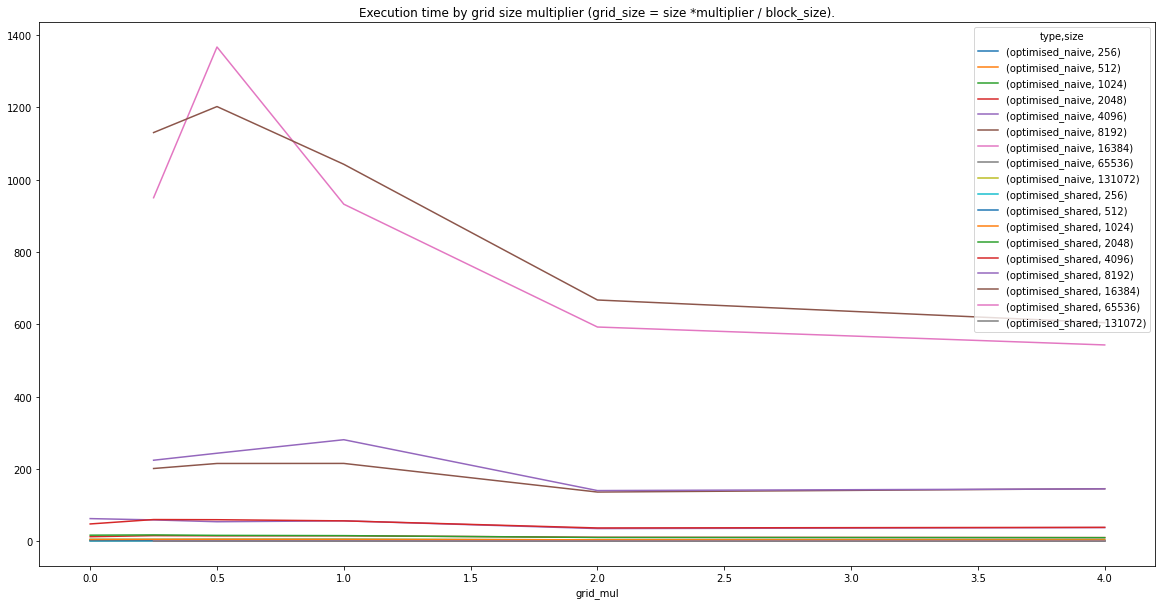

In [84]:
pivoted.plot(figsize=(20,10), title='Execution time by grid size multiplier (grid_size = size *multiplier / block_size).')

<AxesSubplot:title={'center':'Execution time by grid size multiplier (grid_size = size *multiplier / block_size), log scale.'}, xlabel='grid_mul'>

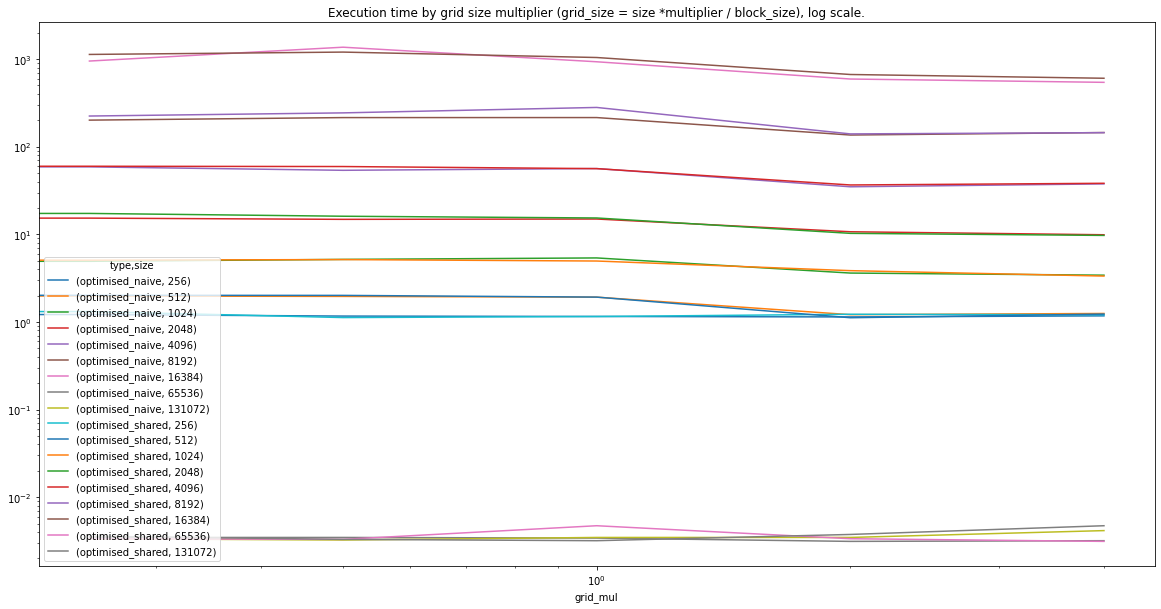

In [85]:
pivoted.plot(figsize=(20,10), title='Execution time by grid size multiplier (grid_size = size *multiplier / block_size), log scale.', logx=True, logy=True)

In [87]:
df = pd.read_csv("../image_scailing/result.txt", sep=';')\
.sort_values(['image', 'scale', 'block_size'])\
.reset_index().drop(columns=["index"])
df

,image,scale,block_size,time
0,aerosmith.pgm,0.1,8,4.309568
1,aerosmith.pgm,0.1,16,4.114464
2,aerosmith.pgm,0.1,32,3.965120
3,aerosmith.pgm,0.1,64,4.216960
4,aerosmith.pgm,0.1,128,4.735200
...,...,...,...,...
157,voyager2.pgm,2.0,128,47.347904
158,voyager2.pgm,2.0,256,43.424831
159,voyager2.pgm,2.0,512,50.319553
160,voyager2.pgm,2.0,1024,36.247551


In [90]:
mean = df.drop(columns=['block_size']).groupby(by=['image', 'scale']).mean().reset_index()
mean

,image,scale,time
0,aerosmith.pgm,0.10,4.224516
1,aerosmith.pgm,0.25,4.406489
2,aerosmith.pgm,0.50,4.728416
3,aerosmith.pgm,0.75,5.449301
4,aerosmith.pgm,1.00,6.269543
5,aerosmith.pgm,1.25,7.143972
6,aerosmith.pgm,1.50,9.337945
7,aerosmith.pgm,1.75,9.741668
8,aerosmith.pgm,2.00,12.556164
9,voyager2.pgm,0.10,15.541543


In [93]:
pivoted = mean.pivot(values='time', columns='image', index='scale')
pivoted

image,aerosmith.pgm,voyager2.pgm
scale,,
0.10,4.224516,15.541543
0.25,4.406489,16.050731
0.50,4.728416,17.121770
0.75,5.449301,19.880771
1.00,6.269543,22.864925
1.25,7.143972,27.567758
1.50,9.337945,32.802233
1.75,9.741668,38.279381
2.00,12.556164,45.753134


<AxesSubplot:title={'center':'Execution time by scailing factor.'}, xlabel='scale'>

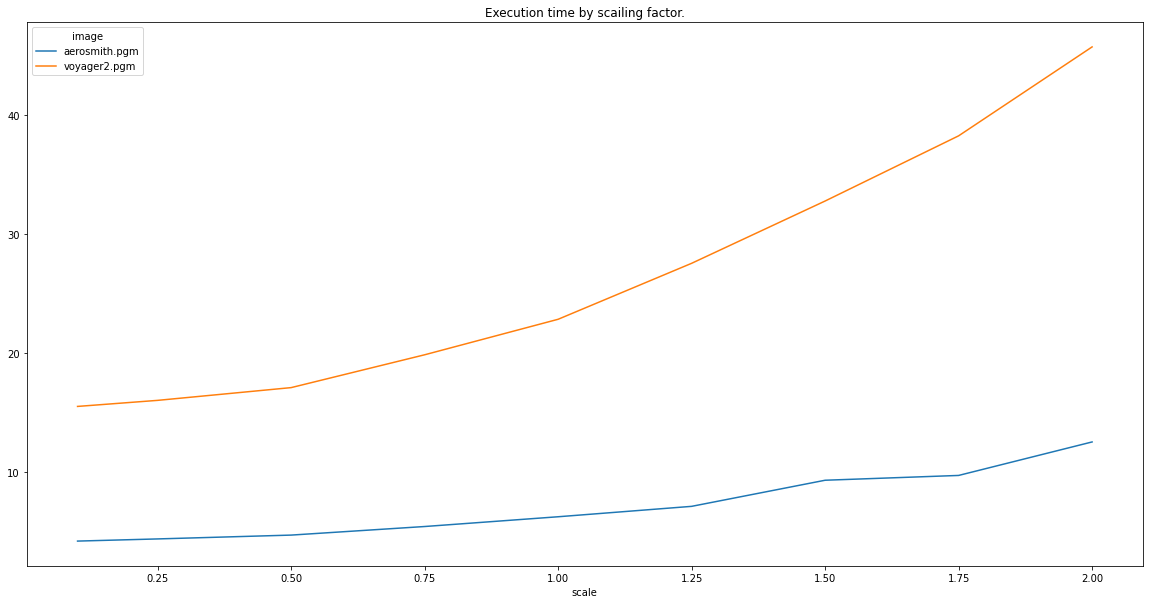

In [95]:
pivoted.plot(figsize=(20,10), title='Execution time by scailing factor.')

<AxesSubplot:title={'center':'Execution time by scailing factor, log scale.'}, xlabel='scale'>

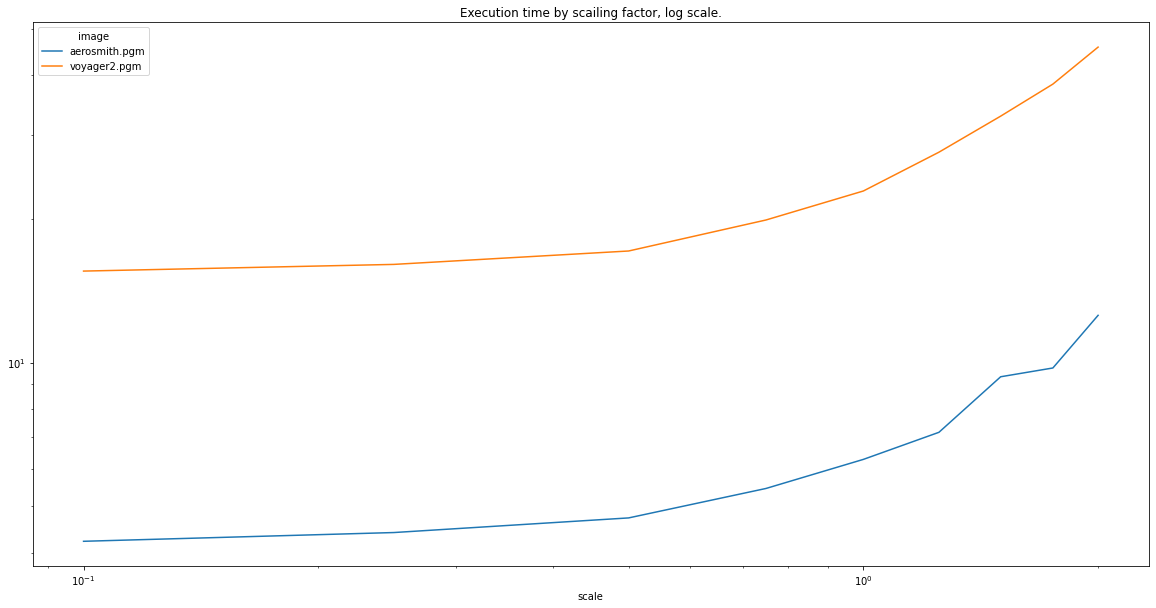

In [97]:
pivoted.plot(figsize=(20,10), logx=True, logy=True, title='Execution time by scailing factor, log scale.')

In [104]:
mean = df.drop(columns=['scale']).groupby(by=['image', 'block_size']).mean().reset_index()
mean

,image,block_size,time
0,aerosmith.pgm,8,6.840434
1,aerosmith.pgm,16,6.804860
2,aerosmith.pgm,32,8.012786
3,aerosmith.pgm,64,6.663196
4,aerosmith.pgm,128,7.158300
5,aerosmith.pgm,256,6.874596
6,aerosmith.pgm,512,6.734251
7,aerosmith.pgm,1024,6.792448
8,aerosmith.pgm,2048,7.977141
9,voyager2.pgm,8,26.458563


In [105]:
pivoted = mean.pivot(values='time', columns='image', index='block_size')
pivoted

image,aerosmith.pgm,voyager2.pgm
block_size,,
8,6.840434,26.458563
16,6.804860,25.534219
32,8.012786,25.886816
64,6.663196,26.359541
128,7.158300,25.736178
256,6.874596,27.480494
512,6.734251,25.789778
1024,6.792448,25.023516
2048,7.977141,27.593141


<AxesSubplot:title={'center':'Execution time by block size.'}, xlabel='block_size'>

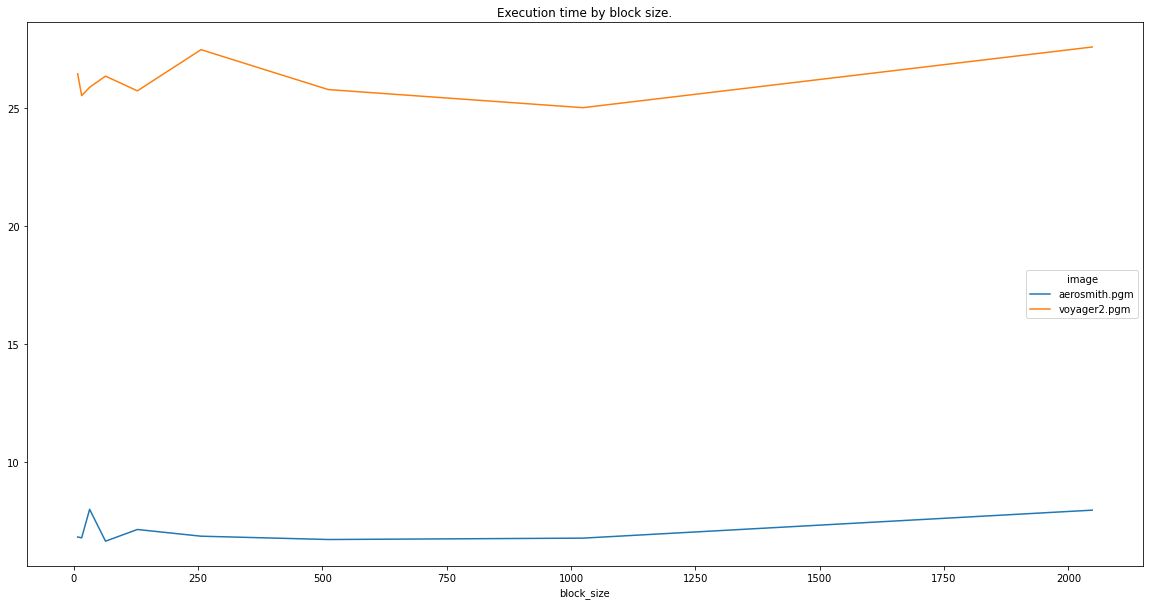

In [108]:
pivoted.plot(figsize=(20,10), title='Execution time by block size.')

<AxesSubplot:title={'center':'Execution time by block size, log scale.'}, xlabel='block_size'>

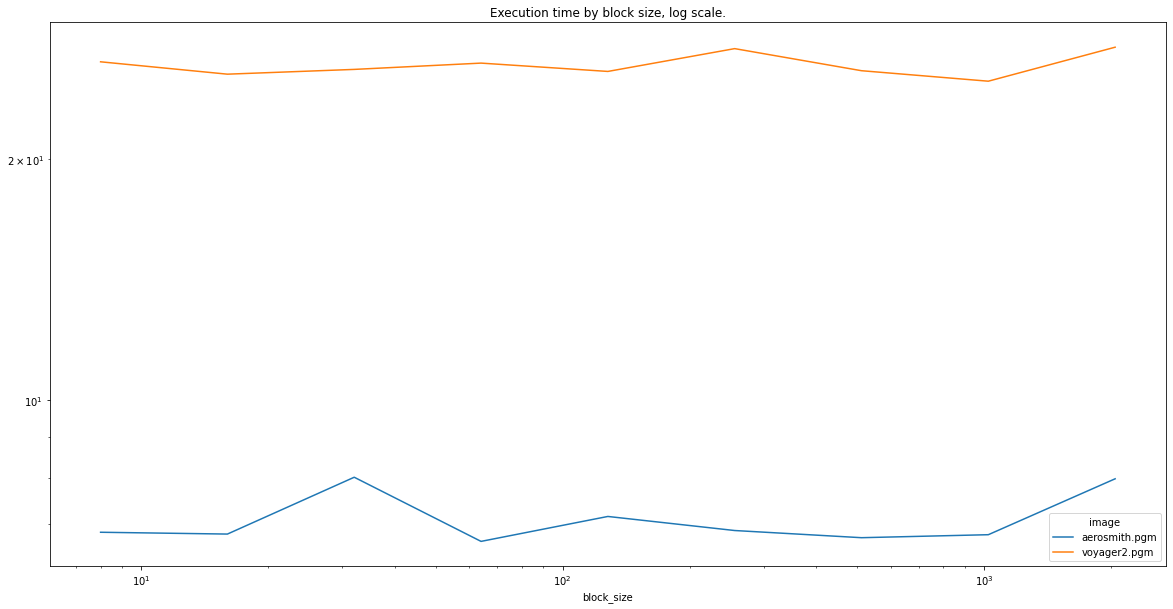

In [109]:
pivoted.plot(figsize=(20,10), logx=True, logy=True, title='Execution time by block size, log scale.')